# Parameters

Notebook for Parameters notes and exercise

Ultimately the goal of any machine learning model is to be able to predict as accurately as possible an output (y) based on a given input (x). The objective is to fit a regression line to the known data where x is the inpedendant variable and y is the dependant variable bases on some function of x. By evaluating a best fit function for x it allows for any value of y to be predicted to a degree of accuracy. 


1. What are parameters <br>
(https://www.geeksforgeeks.org/difference-between-model-parameters-vs-hyperparameters/)<br>
(https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/#:~:text=What%20is%20a%20Model%20Parameter,the%20model%20on%20your%20problem)

- In an equation such as y = 4x + 2, the "4" represents the slope of the line (m), i.e. for each successive value of x, y is 4 times that. the "2" in the equation represents where on the y axis the line crosses when x = 0, in this case 2 , or c. In this simple example the equation is the model, the 4 and 2 are the model parameters. 
- The challenge is given a set of data how to find the optimum parameters for the model function as these parameters have to be estimated from the data.

In [151]:
# Import the required libraries.
import numpy as np

import matplotlib.pyplot as plt

In [152]:
x = np.linspace(0,10,20)
x

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [153]:
y = 6*x - 4 + np.random.normal(0,1,len(x))

y

array([-4.2033852 , -0.09760648,  3.3011743 ,  5.39605626,  8.86849797,
       11.063005  , 14.97621824, 18.85918741, 21.69986537, 25.50071331,
       27.10534014, 30.40374877, 33.59642225, 37.83276253, 39.56327393,
       42.08158537, 46.54431593, 49.78404917, 52.77931063, 55.33517765])

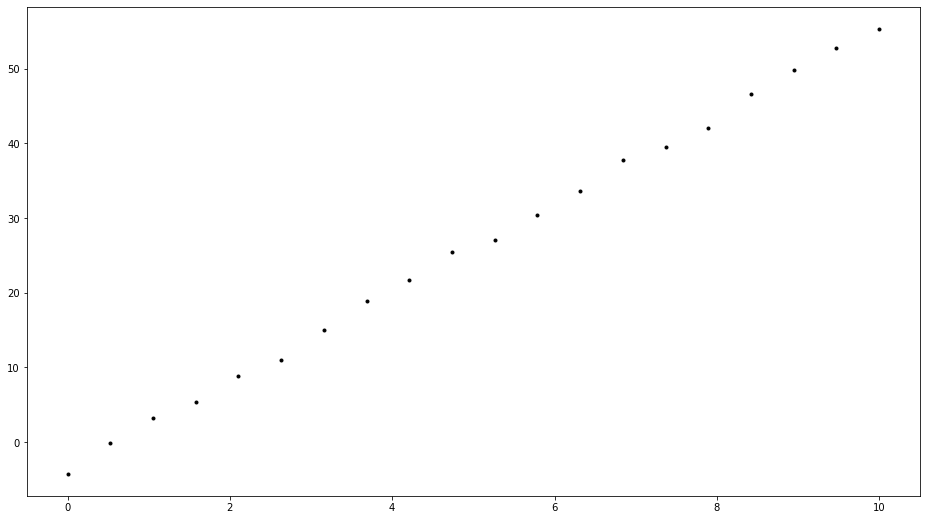

In [154]:
fig,ax = plt.subplots(figsize=(16,9))

ax.plot(x,y,'k.')

In [155]:
params = np.polyfit(x,y,50)


c:\Users\donne\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


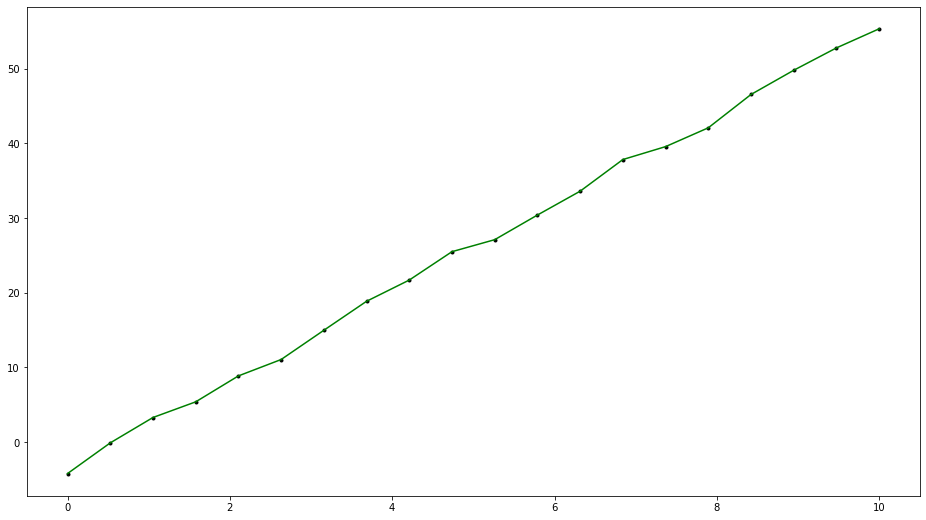

In [156]:
fig,ax = plt.subplots(figsize=(16,9))

ax.plot(x,y,'k.')

ax.plot(x,np.polyval(params,x) ,'g-')


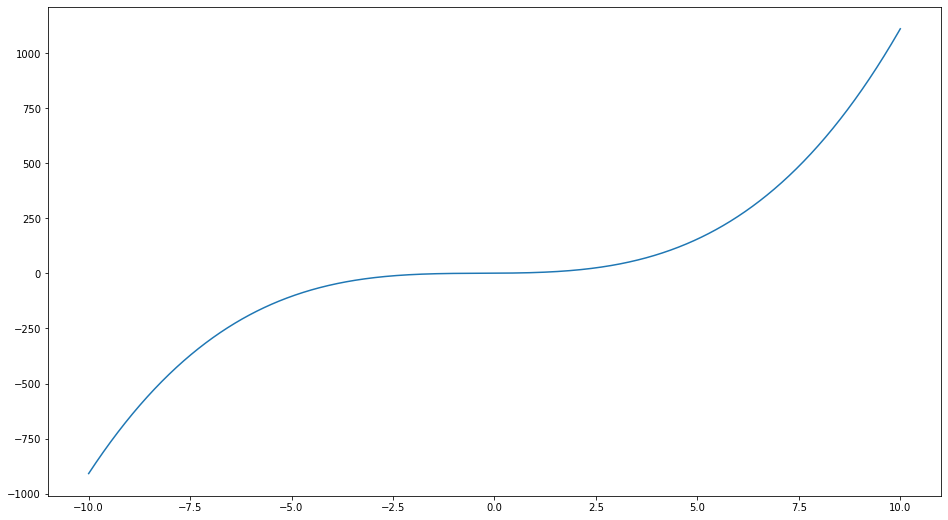

In [157]:
fig,ax = plt.subplots(figsize=(16,9))
xtemp = np.linspace(-10, 10, 1000)

y3 = xtemp**3 + xtemp**2 + xtemp + 1

ax.plot(xtemp,y3)

In [172]:
# Data Set 1
x1 = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
y1 = [1.3, 1.2, 9.4, 27.3, 63.1, 126.5, 217.3, 341.5, 512.8, 729.3, 1001.8, 1332.7, 1728.9, 2198.8, 2743.7, 3376.7]


In [173]:
# Data Set 2:

x2 = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
y2 = [5.7, 16.6, 58.0, 278.9, 1069.3, 3181.4, 7844.3, 16883.9, 32854.9, 59144.2, 100106.7, 161166.3, 248958.6]

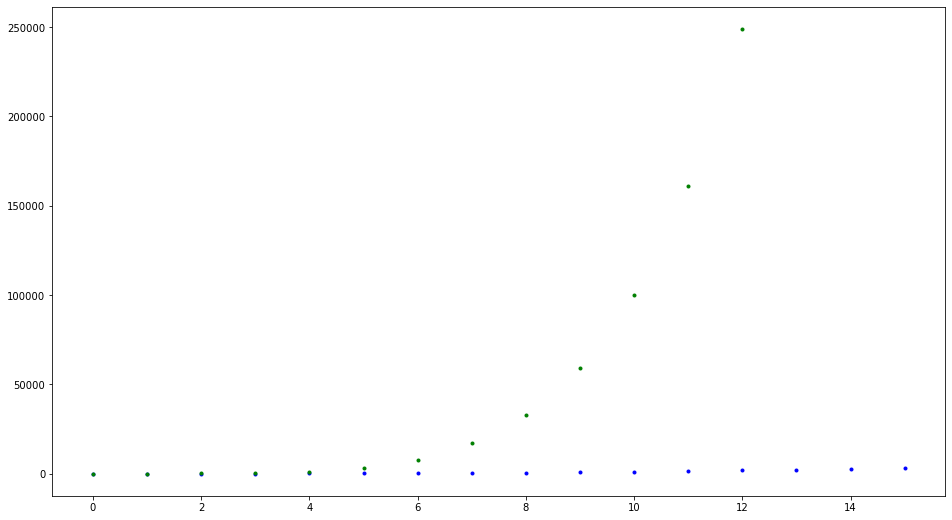

In [174]:
fig,ax = plt.subplots(figsize=(16,9))

ax.plot(x1,y1,'b.')

ax.plot(x2,y2,'g.')

In [177]:
params1 = np.polyfit(x1,y1,3)
params1

array([ 0.99699366,  0.07781416, -0.50388419,  1.22298762])